#Informe 8: Árbol Binario de Búsqueda Óptimo.

##Descripción del Problema:

Un árbol binario de búsqueda es una estructura de datos utilizada en informática que consta principalmente de una raíz y dos nodos hijos. Para todo caso, se cumple que el denominado "hijo izquierdo" contiene un elemento de menor valor que la raíz, mientras que el "hijo derecho" contiene un valor mayor que aquella. Esta descripción se puede extender a conjuntos mayores de datos cambiando el término "hijo" por "sub-árbol", indicando que en lugar de un dato, se encuentra la raíz de otro árbol debajo de nodo inicial.

Los árboles de búsqueda binarios o **Binary Search Tree** (BST, en adelante), son altamente utilizados para representar datos debido a que sus operaciones suelen ser bastante eficientes, por ejemplo, la búsqueda en esta estructura tiene un tiempo de ejecución de $O(log(n))$. Sin embargo, el secreto de la eficiencia en esta operación depende de la **altura (h)** que alcance un **BST**, debido a que aquel valor determinará la cantidad de pasos a realizar en la operación de búsqueda.

Si bien, en un **BST** común y sin orden de prioridad, se espera que la altura siempre se minimize (acercándose al mejor caso), esto cambia cuando se asume que ciertos elementos tienen una mayor "prioridad" o "probabilidad" de ser buscados. En estos casos se espera generar una estructura que permita acceder más rápidamente a los elementos más demandados por el usuario, lo que genera como concecuencia que aquellos valores se encuentren mucho más arriba, en función de que se realice una menor cantidad de pasos para su búsqueda.

Cuando se tiene una lista de probabilidades para ciertos datos, y el objetivo es crear el **BST** más adecuado para hallar de forma más rápida a aquellos, es posible definir este problema como **Optimal BST**, o sea, encontrar el árbol de búsqueda más óptimo.

---

#### **Entradas y Salidas:**

**Entrada**: Secuencia de n datos ordenados: $K=\left<k_1,k_2,...,k_n\right>$. Cada valor $k_i$ tiene una probabilidad $p_i$ de ser buscada y una probabilidad $d_i$ de no serlo. Las *búsquedas fallidas* se representan como: $k_{i-1} \leq d_i \leq k_i$. Cada clave $d_i$ tiene una probabilidad $q_i$ de ser buscada.

**Salida**: Construcción de un **árbol de búsqueda óptimo**, es decir, un árbol que **minimice la cantidad esperada de nodos visitados (costo esperado)**.

##Descripción del Algoritmo:

Un **BST** óptimo debe tomar en cuenta todas las probabilidades que se le entregan a la hora de armar el árbol. No necesariamente, se deben colocar las claves con mayor probabilidad de búsqueda arriba, ya que sería posible determinar si esta acción dejaría más abajo a otras claves (nodos) que juntas suman una mayor probabilidad que el nodo inicial. Por eso, es necesario representar matemáticamente, la cantidad de nodos que se deberán visitar en promedio, a la hora de construir un árbol. A esto se le llama **Costo Esperado**.

---

###Costo Esperado:

Matemáticamente, se representa el costo esperado de un árbol T como la suma de las probabilidades de encontrar un nodo buscado, más las probabilidades de encontrar los nodos no tan buscados. Para indicar mejor esto, se puede poner un ejemplo:

- Tomando en cuenta las siguientes probabilidades, se construyó un el árbol observado:

  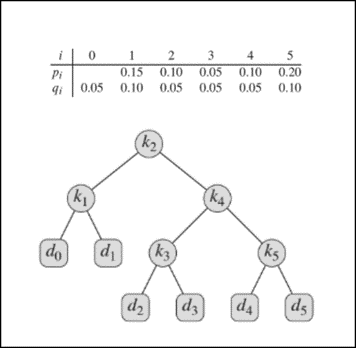

- Entonces, la ecuación a aplicar para hallar el costo esperado de aquel árbol sería:

  - $E[T] =$ Búsqueda en T.

  - $d_T$ = profundidad del nodo correspondiente en el árbol T.

  - $E[T] = 1 + \displaystyle\sum_{i = 1}^{n} d_T(k_i) * p_i + \displaystyle\sum_{i = 0}^{n} d_T(d_i) * q_i$

- Utilizando esa expresión, se obtienen los valores de costo individuales y total:

  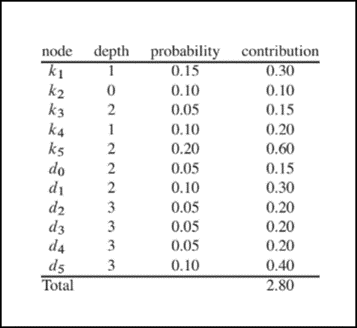

- Se puede observar que el costo esperado de aquel árbol es de 2.8 nodos visitados.

---

##Subestructura óptima:

Es posible analizar la solución en función del costo esperado, de forma que se pueda establecer un retorno común para cualquier cálculo del costo, esta dependerá de las posibilidades para encontrar un nodo, y del índice del nodo raíz actual (k).

- La ecuación quedaría expresada de la siguiente forma:

  $C[i,j] = min(C[i, k-1] + C[k,j] + w(i,j))$, con $i <= j$

  con $w(i,j) = \displaystyle\sum_{l = i}^{n} p_i + \displaystyle\sum_{l = i-1}^{n} q_i$

  $i = $ índice menor
  
  $j = $ índice mayor

---
##Método Recursivo:

Para encontrar el **BST** más óptimo, resulta necesario calcular todos los costos esperados o promedios de cada árbol posible de generar. Para esto, se utiliza la formula que define la sub-estructura óptima del algoritmo, de forma que este se llame recursivamente hasta resolver todos los casos posibles de combinación para las claves del árbol.

###Pasos a seguir (calcular el costo óptimo del árbol):

Considerando un arreglo de nodos $K$, y los arreglos de probabilidad $P$ ($p_i$) y $Q$ ($q_i$).

1. Declarar la posición "1" como inicio = $i$, y "n-1" como final = $j$.
2. Dentro del algoritmo, verificar el caso base: Si $i = j$, devolver $w(i,j)$.
3. Si pasa el filtro del caso base, calcular el costo esperado de aquel árbol (utilizando la fórmula de la subestructura óptima).
4. Retornar el costo óptimo.

---
##Método Dinámico (Bottom-Up):

Utilizando el paradigma de programación dinámica (Bottom-Up), resulta posible crear un algoritmo más eficiente. Esto se debe a que la solución recursiva calcula repetidamente varios costos esperados, generando en las llamadas, los mismos sub-problemas.

Para aplicar la programación dinámica en este algoritmo, se creará una matriz cuadrada de tamaño $n$ = número de claves que almacenará todos los costos promedio encontrados. La solución final será la casilla $m[0][n-1]$.

###Pasos a seguir (calcular el costo óptimo del árbol):

Considerando un arreglo de nodos $K$, y los arreglos de probabilidad $P$ ($p_i$) y $Q$ ($q_i$).

1. Declarar la posición "1" como inicio = $i$, y "n-1" como final = $j$.
2. Llenar la diagonal de la matriz con el valor: $matriz[i][i] = w(i,i)$.
3. Entrar en un ciclo for, para calcular los sub-problemas en base a la longitud de la cadena de valores.
4. Operar en cada fila. Obtener la columna $j$, y el valor de $w(i,j)$.
5. Operar con un for que determine cada valor $r$ que puede ser raíz en el árbol. Dentro de cada iteración,  utilizar la formula de la subestructura óptima para hallar el costo, y asignarlo a la matriz si este valor es el más óptimo.



##3. Implementación del Algoritmo.

###Implementación Recursiva.

In [281]:
def sumProb (P, Q, i, j):
  sum = 0
  #Sumar todas las probabilidades Reales.
  for k in range (i, j+1):
    sum += P[k]
  #Sumar todas las probabilidades Ficticias.
  for k in range (i-1, j+1):
    sum += Q[k]
  return sum

def OptimalBST (keys, P, Q, i, j):
  #Contar Recursiones.
  global contRecursiones
  contRecursiones += 1

  #Caso Base
  if j == i-1: 
    return Q[i-1]

  #Declarar un valor inicial mínimo.
  optCost = 999999999999
  #Obtener la suma de las probabilidades.
  w = sumProb(P, Q, i, j)
  
  #Declarar r como el índice raíz del arreglo de claves.
  for r in range (i, j+1):
      #Obtener el costo mínimo según la subestructura óptima.
      cost = w + OptimalBST(keys, P, Q, i, r-1) + OptimalBST(keys, P, Q, r+1, j)
      #Compara con el costo mínimo actual.
      if cost < optCost:
        optCost = cost

  #Retornar.
  return optCost

#Ejemplo:
claves = [0,1,2,3,4,5]
probP = [0, 0.15, 0.10, 0.05, 0.10, 0.20]
probQ = [0.05, 0.10, 0.05, 0.05, 0.05, 0.10]
contRecursiones = 0
print(f"Arreglo de Claves: {claves}")
print(f"Arreglo de Probabilidades Reales: {probP}")
print(f"Arreglo de Probabilidades Ficticias: {probQ}")
print("==========================================")
optimalCost = OptimalBST(claves, probP, probQ, 1, len(claves)-1)
print(f"Costo promedio del BST Óptimo: {optimalCost}")
print(f"Cantidad de recursiones: {contRecursiones-1}")

Arreglo de Claves: [0, 1, 2, 3, 4, 5]
Arreglo de Probabilidades Reales: [0, 0.15, 0.1, 0.05, 0.1, 0.2]
Arreglo de Probabilidades Ficticias: [0.05, 0.1, 0.05, 0.05, 0.05, 0.1]
Costo promedio del BST Óptimo: 2.75
Cantidad de recursiones: 242


###Implementación Recursiva con `Verbose == True`:

In [192]:
from termcolor import cprint

def sumProb (P, Q, i, j):
  sum = 0
  #Sumar todas las probabilidades Reales.
  for k in range (i, j+1):
    sum += P[k]
  #Sumar todas las probabilidades Ficticias.
  for k in range (i-1, j+1):
    sum += Q[k]
  return sum

def OptimalBST (keys, P, Q, i, j):
  #Contar Recursiones.
  global contRecursiones
  contRecursiones += 1

  #Caso Base
  if j == i-1:
    cprint(f"Recursión N°{contRecursiones-1} ---> Caso Base {j} == {i}-1", "red", end=' ')
    cprint(f"---> Retorna {Q[i-1]}", "red", attrs=['bold'])
    return Q[i-1]

  #Declarar un valor inicial mínimo.
  optCost = 999999999999
  #Obtener la suma de las probabilidades.
  w = sumProb(P, Q, i, j)
  
  #Declarar r como el índice raíz del arreglo de claves.
  for r in range (i, j+1):
      #Obtener el costo mínimo según la subestructura óptima.
      if contRecursiones-1 != 0: cprint(f"Recursión N°{contRecursiones-1} ---> Calcular Costo.", "blue", attrs=['bold'], end=' ')
      else: cprint(f"Caso Inicial --> Calcular Costo.", "blue", attrs=['bold'], end=' ')
      cprint(f"Rango: {i} - {j}", "white", attrs=['bold'])
      cprint("Calcular Costo Esperado: 2 Recursiones necesarias.", "yellow")
      cost = w + OptimalBST(keys, P, Q, i, r-1) + OptimalBST(keys, P, Q, r+1, j)
      cprint(f"Costo Calculado: {cost}", "white")
      #Compara con el costo mínimo actual.
      if cost < optCost:
        optCost = cost

  #Retornar.
  cprint(f"Costo Óptimo encontrado para el rango {i} - {j}: {optCost}", "green", attrs=['bold'])
  print("--------------------------------------------------")
  return optCost

#Ejemplo:
claves = [0,1,2,3,4,5]
probP = [0, 0.15, 0.10, 0.05, 0.10, 0.20]
probQ = [0.05, 0.10, 0.05, 0.05, 0.05, 0.10]
contRecursiones = 0
print(f"Arreglo de Claves: {claves}")
print(f"Arreglo de Probabilidades Reales: {probP}")
print(f"Arreglo de Probabilidades Ficticias: {probQ}")
print("==========================================")
optimalCost = OptimalBST(claves, probP, probQ, 1, len(claves)-1)
print("==========================================")
print(f"Costo promedio del BST Óptimo: {optimalCost}")
print(f"Cantidad de recursiones: {contRecursiones-1}")

Arreglo de Claves: [0, 1, 2, 3, 4, 5]
Arreglo de Probabilidades Reales: [0, 0.15, 0.1, 0.05, 0.1, 0.2]
Arreglo de Probabilidades Ficticias: [0.05, 0.1, 0.05, 0.05, 0.05, 0.1]
Caso Inicial --> Calcular Costo. Rango: 1 - 5
Calcular Costo Esperado: 2 Recursiones necesarias.
Recursión N°1 ---> Caso Base 0 == 1-1 ---> Retorna 0.05
Recursión N°2 ---> Calcular Costo. Rango: 2 - 5
Calcular Costo Esperado: 2 Recursiones necesarias.
Recursión N°3 ---> Caso Base 1 == 2-1 ---> Retorna 0.1
Recursión N°4 ---> Calcular Costo. Rango: 3 - 5
Calcular Costo Esperado: 2 Recursiones necesarias.
Recursión N°5 ---> Caso Base 2 == 3-1 ---> Retorna 0.05
Recursión N°6 ---> Calcular Costo. Rango: 4 - 5
Calcular Costo Esperado: 2 Recursiones necesarias.
Recursión N°7 ---> Caso Base 3 == 4-1 ---> Retorna 0.05
Recursión N°8 ---> Calcular Costo. Rango: 5 - 5
Calcular Costo Esperado: 2 Recursiones necesarias.
Recursión N°9 ---> Caso Base 4 == 5-1 ---> Retorna 0.05
Recursión N°10 ---> Caso Base 5 == 6-1 ---> Retorna 0

###Implementación Dinámica (Bottom-Up):

In [399]:
def DynamicOptimalBST (keys, P, Q, i, n):
  #Matrices auxiliares.
  cost = [[0 for x in range(n)] #Matriz de Costos.
          for y in range(n+1)]
  w = [[0 for x in range(n)]    #Matriz de Sumas de probabilidades.
          for y in range(n+1)]
  root = [[0 for x in range(n)] #Matriz de raíces para el árbol.
          for y in range(n)]

  #Llenar la diagonal de 2 matrices con los valores ficticios.
  for i in range (1, n+1):
    cost[i][i-1] = Q[i-1]
    w[i][i-1] = Q[i-1]

  #Marcar el largo del rango: Cantidad de claves a analizar.
  for L in range(1, n+1):
    
    #Obtener la fila (i).
    for i in range(1, n - L + 2):
      #Obtener la columna (j) utilizando el valor de (i) y (L).
      j = i + L - 1
      #Verificar que sea una columna válida. 
      if i >= n or j >= n:
        break
            
      #Inicializar valor del costo en este rango.
      cost[i][j] = 99999999999
      #Calcular la suma de probabilidades en este rango.
      w[i][j] = w[i][j-1] + P[j] + Q[j]
             
      #Generar todas las raíces (r) posibles del rango [i..j]
      for r in range(i, j+1):
        #Contador de Sub-problemas.
        global contSub
        contSub += 1
        #Calcular el costo esperado si r fuera la raíz del árbol en este rango.
        c = cost[i][r - 1] + cost[r + 1][j] + w[i][j]
        #Verificar si el costo calculado es el más óptimo.
        if (c < cost[i][j]):
          #Reemplazar datos.
          cost[i][j] = c
          root[i][j] = r

  return cost[1][n - 1], root[1][n-1]

#Ejemplo:
claves = [0,1,2,3,4,5]
probP = [0, 0.15, 0.10, 0.05, 0.10, 0.20]
probQ = [0.05, 0.10, 0.05, 0.05, 0.05, 0.10]
contSub = 0
print(f"Arreglo de Claves: {claves}")
print(f"Arreglo de Probabilidades Reales: {probP}")
print(f"Arreglo de Probabilidades Ficticias: {probQ}")
print("==========================================")
optimalCost, optimalRoot = DynamicOptimalBST(claves, probP, probQ, 1, len(claves))
print("==========================================")
print(f"Costo promedio del BST Óptimo: {optimalCost}")
print(f"Cantidad de Sub-Problemas: {contSub}")

Arreglo de Claves: [0, 1, 2, 3, 4, 5]
Arreglo de Probabilidades Reales: [0, 0.15, 0.1, 0.05, 0.1, 0.2]
Arreglo de Probabilidades Ficticias: [0.05, 0.1, 0.05, 0.05, 0.05, 0.1]
Costo promedio del BST Óptimo: 2.75
Cantidad de Sub-Problemas: 35


###Implementación con `verbose == true`:

In [243]:
def printMatriz (Matriz):
  for line in Matriz:
    print ('  '.join(map(str, line)))
  print("\n")

def DynamicOptimalBST (keys, P, Q, i, n):
  #Matrices auxiliares.
  cost = [[0 for x in range(n)] #Matriz de Costos.
          for y in range(n+1)]
  w = [[0 for x in range(n)]    #Matriz de Sumas de probabilidades.
          for y in range(n+1)]
  root = [[0 for x in range(n)] #Matriz de raíces para el árbol.
          for y in range(n)]

  #Llenar la diagonal de 2 matrices con los valores ficticios.
  for i in range (1, n+1):
    cost[i][i-1] = Q[i-1]
    w[i][i-1] = Q[i-1]

  #Marcar el largo del rango: Cantidad de claves a analizar.
  for L in range(1, n+1):

    #Obtener la fila (i).
    for i in range(1, n - L + 2):
      #Obtener la columna (j) utilizando el valor de (i) y (L).
      j = i + L - 1
      #Verificar que sea una columna válida. 
      if i >= n or j >= n:
        break
            
      #Inicializar valor del costo en este rango.
      cost[i][j] = 99999999999
      #Calcular la suma de probabilidades en este rango.
      w[i][j] = w[i][j-1] + P[j] + Q[j]
      
      #Verbose
      cprint(f"Rango: {i} - {j} ---> ", "white", attrs=['bold'], end='')
      cprint(f"Calcular Costo.", "white", attrs=['bold'])

      #Generar todas las raíces (r) posibles del rango [i..j]
      for r in range(i, j+1):
        #Contador de Sub-problemas.
        global contSub
        contSub += 1
        cprint(f"Sub-Problema N°{contSub} ---> ", "blue", attrs=['bold'], end='')
        cprint(f"Root Actual: {r}", "yellow")
        #Calcular el costo esperado si r fuera la raíz del árbol en este rango.
        c = cost[i][r - 1] + cost[r + 1][j] + w[i][j]
        cprint(f"Costo obtenido: {c}", "white")
        #Verificar si el costo calculado es el más óptimo.
        if (c < cost[i][j]):
          #Reemplazar datos.
          cost[i][j] = c
          root[i][j] = r
        cprint(f"Costo óptimo del rango: {cost[i][j]}", "green", attrs=['bold'])

  # printMatriz(cost)
  # print("\n")
  # printMatriz(root)
  return cost[1][n - 1], root

#Ejemplo:
claves = [0,1,2,3,4,5]
probP = [0, 0.15, 0.10, 0.05, 0.10, 0.20]
probQ = [0.05, 0.10, 0.05, 0.05, 0.05, 0.10]
contSub = 0
print(f"Arreglo de Claves: {claves}")
print(f"Arreglo de Probabilidades Reales: {probP}")
print(f"Arreglo de Probabilidades Ficticias: {probQ}")
print("==========================================")
optimalCost, root = DynamicOptimalBST(claves, probP, probQ, 1, len(claves))
print("==========================================")
print(f"Costo promedio del BST Óptimo: {optimalCost}")
print(f"Cantidad de Sub-Problemas: {contSub}")

Arreglo de Claves: [0, 1, 2, 3, 4, 5]
Arreglo de Probabilidades Reales: [0, 0.15, 0.1, 0.05, 0.1, 0.2]
Arreglo de Probabilidades Ficticias: [0.05, 0.1, 0.05, 0.05, 0.05, 0.1]
Rango: 1 - 1 ---> Calcular Costo.
Sub-Problema N°1 ---> Root Actual: 1
Costo obtenido: 0.45000000000000007
Costo óptimo del rango: 0.45000000000000007
Rango: 2 - 2 ---> Calcular Costo.
Sub-Problema N°2 ---> Root Actual: 2
Costo obtenido: 0.4
Costo óptimo del rango: 0.4
Rango: 3 - 3 ---> Calcular Costo.
Sub-Problema N°3 ---> Root Actual: 3
Costo obtenido: 0.25
Costo óptimo del rango: 0.25
Rango: 4 - 4 ---> Calcular Costo.
Sub-Problema N°4 ---> Root Actual: 4
Costo obtenido: 0.30000000000000004
Costo óptimo del rango: 0.30000000000000004
Rango: 5 - 5 ---> Calcular Costo.
Sub-Problema N°5 ---> Root Actual: 5
Costo obtenido: 0.5
Costo óptimo del rango: 0.5
Rango: 1 - 2 ---> Calcular Costo.
Sub-Problema N°6 ---> Root Actual: 1
Costo obtenido: 0.9
Costo óptimo del rango: 0.9
Sub-Problema N°7 ---> Root Actual: 2
Costo ob

###Construcción del Árbol usando la matriz.

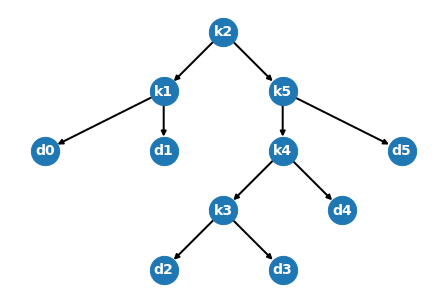

In [382]:
import networkx as nx
from networkx.drawing.nx_pydot import graphviz_layout

#Buscar claves izquierdas.
def LeftEdge (rootMatrix, root, T, i, j):
  #Ver rootL
  cont = 1
  rootL = rootMatrix[i][j-cont]
  
  while j-cont > 1:
    cont += 1
    if root != rootL:
      T.add_edge(f"k{root}", f"k{root-1}")
      RightEdge(rootMatrix, rootL, T, i, j-cont)
    root = rootL
    rootL = rootMatrix[i][j-cont]

#Buscar claves derechas.
def RightEdge (rootMatrix, root, T, i, j):
  #Ver rootR
  cont = 1
  rootR = rootMatrix[i+cont][j]

  while i+cont < j:
    cont += 1
    if root != rootR:
      T.add_edge(f"k{root}", f"k{rootR}")
      LeftEdge(rootMatrix, rootR, T, i+cont, j)
    root = rootR
    rootR = rootMatrix[i+cont][j]

#Agregar los nodos ficticios hoja.
def addFictionals (rootMatrix, root, T, i, j):
  for n in range (i, j+1):
    if len(list(T.successors(f"k{n}"))) == 0:
      T.add_edge(f"k{n}", f"d{n-1}")
      T.add_edge(f"k{n}", f"d{n}")
    elif len(list(T.successors(f"k{n}"))) == 1:
      aux = list(T.successors(f"k{n}"))
      if int(aux[0][1]) > n:
        T.add_edge(f"k{n}", f"d{n-1}")
      else:
        T.add_edge(f"k{n}", f"d{n}")



def AddEdges (rootMatrix, root, T, i, j):
  LeftEdge(rootMatrix, root, T, i, j-1)
  RightEdge(rootMatrix, root, T, i+1, j)
  addFictionals(rootMatrix, root, T, i, j)


def ConstructOptimalBST (rootMatrix, P, Q):
  #Crear Grafo
  T = nx.DiGraph()
  AddEdges(rootMatrix, rootMatrix[1][len(Q)-1], T, 1, len(Q)-1)
  pos = graphviz_layout(T, prog="dot")

  #Mostrar Grafo
  nx.draw(T,pos, with_labels=True, node_size=800, font_color="white", font_size=14, font_weight="black", width  =2.0, edge_color ="black")

ConstructOptimalBST(root, probP, probQ)

##4. Correctitud del Algoritmo:
---
###4.1 Correctitud para la subestructura óptima

$Teorema:$ *La subestructura óptima permite minimizar los costos que tendrá un árbol a través de subproblemas.*

Sea un costo $C^*$ el costo del árbol con raíces $k_x$ de un arreglo $K$, podemos calcular el costo mínimo considerando el cálculo de sus subproblemas:


* $C^*$<sub>1,n</sub> = $Min(CombinacionesDeUnArreglo([k_1,k_2,...,k_n]))$

$<$$C^*$<sub>1,n</sub>$>$ corresponde al mínimo valor obtenido para una serie de combinaciones donde se considera a cada elemento $k_i$ una raíz de un árbol binario de búsqueda óptimo. Teniendo en cuenta este elemento como raíz de un árbol podemos considerar un arreglo izquierdo y derecho a este, donde podemos calcular los costos para cada uno de ellos aplicando la misma estrategia anterior.


---

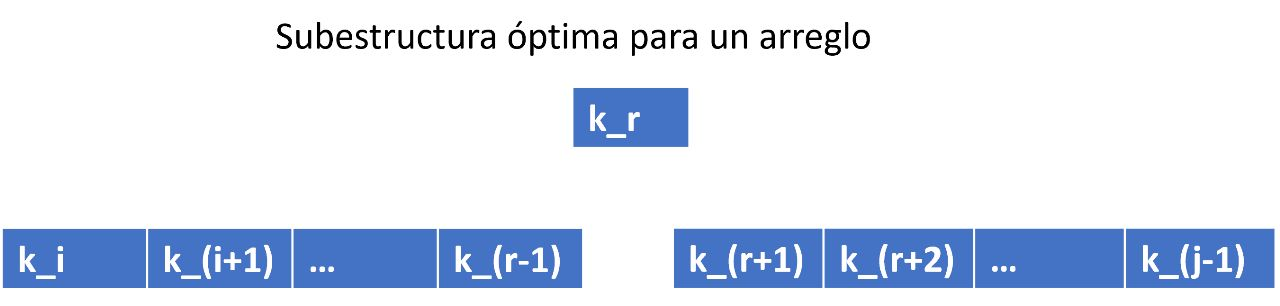


Gracias a esto, podemos calcular el costo dividiendo el problema en subproblemas para cualquier árbol o sub-árbol y cuando se llegue a un caso base de único elemento empezar a calcular el valor mínimo para una combinación posible del árbol principal.

[Insertar imagen 2]

Sabiendo lo anterior, podemos decir que va a llegar un punto que el problema tendrá un caso base, donde es un único elemento del arreglo. Estos corresponden a las probabilidades ficticias que son las hojas de todos los árboles, al volver a armar el árbol iremos calculando los sub-árboles más pequeños y luego los más grandes a partir de los ya resueltos. Según lo anterior, podemos calcular el mínimo de cada árbol formado por una clave $k_i$.

---

---

##4.2 Función de recurrencia del valor óptimo

Dados tres arreglos, uno de claves $(keys)$, probabilidades de keys $(p)$ y probabilidades ficticias $(q)$, podemos definir una función de recurrencia en base al punto anterior (3.1).

Dado una clave $k_r$ perteneciente $[i...j]$ podemos obtener dos estructuras auxiliares:

* Arreglo $A_1$ que va tiene contiene los elementos desde $[i...r-1]$

* Arreglo $A_2$ que va tiene contiene los elementos desde $[r+1...j]$

Dado lo anterior, para cada uno de estos arreglos se puede obtener una un coste mínimo. Este proceso se puede repetir múltiples veces hasta obtener el caso base donde llegamos a las claves ficticias. Por tanto, podemos definir la siguiente función de recurrencia.


* $C$<sub>(i,j)</sub> = $min$<sub>(i $\leq$ k $\leq$ j)</sub> {C<sub>(i,k-1)</sub> + C<sub>(k+1,j)</sub>} $+$ $\displaystyle\sum_{r=i}^{j} p_r$ $+$ $\displaystyle\sum_{r=i-1}^{j} q_r$ $////$ Si y solo si $i < j$


* $C$<sub>(i,j)</sub> = q[i] $////$ Si y solo si $i = j$

Donde C<sub>(i,k-1)</sub> corresponde al costo del arreglo $A_1$ y C<sub>(k+1,j)</sub> corresponde a $A_2$, donde serian el sub-árbol izquierdo y derecho respectivamente.

---

##4.3 Correctitud del algoritmo Bottom-Up

$Teorema:$ El algoritmo resuelto mediante Bottom-up retorna el costo mínimo de un árbol binario de búsqueda óptimo

Dados tres arreglos, uno de claves $(keys)$ de tamaño $n$, probabilidades de las claves $(p)$ de tamaño $n$ y probabilidades ficticias $(q)$ de tamaño $n+1$, podemos probar por inducción y la lógica que ejerce Bottom-up en este problema, que el algoritmo minimiza el recorrido de un árbol por sus nodos.

Sea $P(1)$ el caso base, correspondiente a un nodo hoja del árbol y esos nodos son las claves ficticias que tienen una probabilidades dadas en el arreglo $q$. Como dichas claves son inexistente, pero se pueden representar por su probabilidad, podemos decir, que dichas probabilidades son equivalentes a los casos bases para empezar a construir el valor óptimo. En consecuencia, a ser valores únicos, también son la subestructura óptima base para obtener el valor óptimo, obteniendo que para dicha subestructura su coste esperado o valor óptimo es correcto.


Sea $P(m)$ con $m < n$ un subproblema o sub-árbol del problema original, podemos decir que estos subproblemas tienen un coste mínimo gracias a la estrategia Bottom-up, debido a que ya teniendo los problemas bases que son las claves ficticias, se pueden ir armando los sub-árboles de abajo hacia arriba y no se necesita descomponer el árbol desde una clave $k_i$ para obtener sus valores base y volver a armar el árbol calculando el coste. Como dichos valores de los subproblemas se van almacenando en estructuras auxiliares, no debemos volver a calcular los valores para valores que ya fueron obtenidos en otras ocasiones como en el caso recursivo. En conclusión, podemos decir que el algoritmo retorna el valor óptimo para un árbol que se puede construir a partir de un arreglo $k$.

##5. Tiempo de Ejecución:

Para calcular la complejidad temporal de cada algoritmo se realizará un análisis al manejo de los sub-problemas y la subestructura óptima que realiza cada versión, a fin de demostrar cuantos sub-problemas resuelve el algoritmo, y cuanto tarda en resolver cada uno de aquellos.

---
###**---> Recursivo:**

En el caso del algoritmo recursivo, considera cada recursión como un sub-problema distinto. Esta versión calcula el costo utilizando la subestructura óptima, generando dos recursiones por cálculo, pero al iterar más a fondo, la cantidad de sub-problemas crece según la raíz seleccionada durante el ciclo for inicial.

Se puede observar mejor considerando la representación de la subestructura óptima vista en la correctitud.

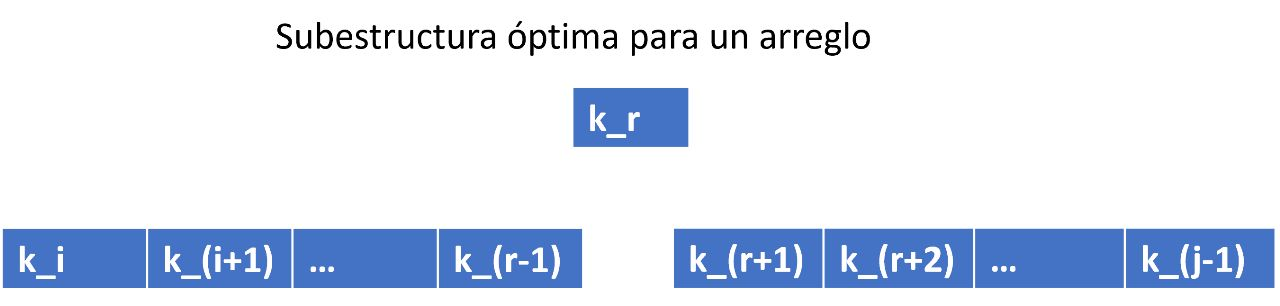


Es posible establecer una ecuación de recurrencia para este algoritmo considerando la forma en que trabaja los sub-problemas.

- Tomando en cuenta que la cantidad de sub-problemas crece en función de la clave raíz, se puede determinar que:

  $T(n) = \displaystyle\sum_{i = 0}^{n-1} T(i)$

- Ahora considerando la otra expresión vista para la subestructura óptima (representada en el código):

  $C[i,j] = \min\limits_{i\leq k \leq j}(C[i, k-1] + C[k,j] + w(i,j))$

  - Se infiere que el tiempo de ejecución para $w(i,j)$ es de O(n). Por lo que:

   $T(n) = \displaystyle\sum_{i = 0}^{n-1} T(i) + n $

  - Desarrollando la expresión queda:
   
   $T(n) = T(n-1) + T(n-2) + T(n-3) ... + T(0) + n $

  - Reduciendo los valores a una expresión conocida $(Fibonacci = F(n) = F(n-1) + F(n-2))$:

   $F(n-1) + F(n-2) \leq T(n-1) + T(n-2) + T(n-3) ... + T(0) + n $
   
   $T(n) \geq T(n-1) + T(n-2)$

   $T(n) \geq 2^n $

El tiempo de ejecución del algoritmo recursivo es de $O(2^n)$


---
###**---> Dinámico:**

####Definir la cantidad de sub-problemas:

En el algoritmo dinámico, se utiliza memoria extra para guardar las soluciones de los sub-problemas resueltos, de forma que el programa utilice esta información si se vuelve a topar con algún sub-problema repetido.

Cómo se aprecia en el código, los sub-problemas se almacenan en una matriz. Esto se debe a que estos depende de los índices iniciales y finales que tomarán para análizar el sub-problema. $i$ pasa a ser la clave más baja a utilizar, mientras que $j$ será la más alta. De esta forma se generan distintos rangos.

- Considerando que los índices varían en un rango propio, y que k será la cantidad de raíces (sub-problemas) a evaluar, se tiene que:

  - $S(n) = \displaystyle\sum_{i = 1}^{n} \displaystyle\sum_{j = 0}^{n-1}$ $k$<sub>$ij$</sub>
  - $S(n)$ = cantidad de sub-problemas.

- Tomando en cuenta que ambas sumatorias realizan $n$ pasos, se reduce la expresión a la siguiente:
  - $S(n) = O(n^2)$

Con lo anterior, es posible definir que el algoritmo resuelve $O(n^2)$ sub-problemas.

####Tiempo de Ejecución:

Para evaluar el tiempo de ejecución, es necesario obtener la complejidad de cada sub-problema. Los $O(n^2)$ sub-problemas, de forma general, se resuelven mediante la fórmula de la subestructura óptima.

- Teniendo la fórmula:
  - $C[i,j] = \min\limits_{i\leq k \leq j}(C[i, k-1] + C[k,j] + w(i,j))$
- Sabiendo que w(i,j) se calcula como:
  - $w(i,j) = \displaystyle\sum_{l = i}^{n} p_i + \displaystyle\sum_{l = i-1}^{n} q_i = O(n)$
- Y considerando que los costos anteriores ya fueron calculados, se obtiene que:
  - $C[i,j] = O(1) + O(1) + O(n)$
  - $C[i,j] = O(n)$

Cada sub-problema se calcula en un tiempo de O(n). Lo que deriva en la siguiente fórmula:

- $T(n) = O(n^2) * O(n)$. ---> Cantidad de sub-problemas X tiempo de ejecución individual.
- $T(n) = O(n^3)$

Esto da un tiempo de ejecución para el algoritmo de $O(n^3)$. Esto toma validez si se analiza el código, donde se realizan tres ciclos for anidados que tienen rangos $O(n)$.

No obstante, si se considera una matriz que guarde todos los datos de "$w(i,j)$", y se modifica el algoritmo en función de que cumpla únicamente con los valores de la subestructura óptima que representen una raíz válida entre los rangos determinados, es posible reducir el tiempo de ejecución.

####Complejidad Espacial:

Al ser un algoritmo dinámico, este guarda la información y resultados de los sub-problemas que debe ir resolviendo en función de utilizarlos más tarde durante el procedimiento. En este caso, el algoritmo hace uso de tres matrices auxiliares que guardan información obtenida de cada sub-problema.

Considerando lo anterior, se establece que:

 - Cada matriz guarda $\displaystyle\sum_{i = 1}^{n} \displaystyle\sum_{j = 0}^{n-1} k $ elementos.
 - A raíz de lo anterior, se obtiene que cada matriz ocupa $O(n^2)$.
 - Al ser tres matrices se concluye que la complejidad temporal es de $3*O(n^2)$.

##6. Experimentación:

Para probar las propiedades de los algoritmos se realizarán dos experimentos en función de comparar la forma de resolver el problema planteado en un inicio.

El código a utilizar se mostrará a continuación:

In [390]:
#@title Optimal BST Recursivo
def sumProb (P, Q, i, j):
  sum = 0
  #Sumar todas las probabilidades Reales.
  for k in range (i, j+1):
    sum += P[k]
  #Sumar todas las probabilidades Ficticias.
  for k in range (i-1, j+1):
    sum += Q[k]
  return sum

def OptimalBST (keys, P, Q, i, j):
  #Contar Recursiones.
  global contRecursiones
  contRecursiones += 1

  #Caso Base
  if j == i-1: 
    return Q[i-1]

  #Declarar un valor inicial mínimo.
  optCost = 999999999999
  #Obtener la suma de las probabilidades.
  w = sumProb(P, Q, i, j)
  
  #Declarar r como el índice raíz del arreglo de claves.
  for r in range (i, j+1):
      #Obtener el costo mínimo según la subestructura óptima.
      cost = w + OptimalBST(keys, P, Q, i, r-1) + OptimalBST(keys, P, Q, r+1, j)
      #Compara con el costo mínimo actual.
      if cost < optCost:
        optCost = cost

  #Retornar.
  return optCost

In [389]:
#@title Optimal BST Dinámico
def DynamicOptimalBST (keys, P, Q, i, n):
  #Matrices auxiliares.
  cost = [[0 for x in range(n)] #Matriz de Costos.
          for y in range(n+1)]
  w = [[0 for x in range(n)]    #Matriz de Sumas de probabilidades.
          for y in range(n+1)]
  root = [[0 for x in range(n)] #Matriz de raíces para el árbol.
          for y in range(n)]

  #Llenar la diagonal de 2 matrices con los valores ficticios.
  for i in range (1, n+1):
    cost[i][i-1] = Q[i-1]
    w[i][i-1] = Q[i-1]

  #Marcar el largo del rango: Cantidad de claves a analizar.
  for L in range(1, n+1):
    
    #Obtener la fila (i).
    for i in range(1, n - L + 2):
      #Obtener la columna (j) utilizando el valor de (i) y (L).
      j = i + L - 1
      #Verificar que sea una columna válida. 
      if i >= n or j >= n:
        break
            
      #Inicializar valor del costo en este rango.
      cost[i][j] = 99999999999
      #Calcular la suma de probabilidades en este rango.
      w[i][j] = w[i][j-1] + P[j] + Q[j]
             
      #Generar todas las raíces (r) posibles del rango [i..j]
      for r in range(i, j+1):
        #Contador de Sub-problemas.
        global contSub
        contSub += 1
        #Calcular el costo esperado si r fuera la raíz del árbol en este rango.
        c = cost[i][r - 1] + cost[r + 1][j] + w[i][j]
        #Verificar si el costo calculado es el más óptimo.
        if (c < cost[i][j]):
          #Reemplazar datos.
          cost[i][j] = c
          root[i][j] = r

  return cost[1][n - 1], root[1][n-1]

---
###Experimento 1: Comparación de Tiempo de Ejecución

En este experimento se mostrará con un gráfico el tiempo que tarda cada algoritmo encontrar una solución al problema (Encontrar el costo del árbol óptimo).

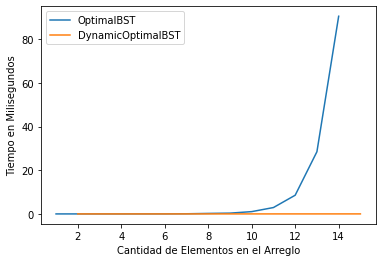

In [404]:
from matplotlib import cm
import numpy as np
import random
import matplotlib.pyplot as plt
import datetime
from timeit import repeat

def optimal_bst_instance_generator(n):
    keys = sorted(random.sample(range(1, 100), n))
    arr = np.random.random(n*2+1)
    arr /= arr.sum()
    
    p = list(arr[:n]) # Probabilidad de las claves
    q = list(arr[n:]) # Probabilidad de las claves ficticias
    return keys, p, q

x=[]; y=[]
ix=[]; iy=[]
for n in range(1,15):
  keys, p, q = optimal_bst_instance_generator(n)
  keys.insert(0,0)
  p.insert(0,0)
  i = 1
  j = len(keys) - 1
  z = repeat(setup="from __main__ import OptimalBST", stmt=f"OptimalBST({keys},{p},{q},{i},{j})", repeat=1, number=20)
  x.append(n)
  y.append(z)

  i = 1
  n = len(keys)
  l = repeat(setup="from __main__ import DynamicOptimalBST", stmt=f"DynamicOptimalBST({keys},{p},{q},{i},{n})", repeat=1, number=20)  
  ix.append(n)
  iy.append(l)

plt.plot(x,y)
plt.plot(ix,iy)
plt.legend(["OptimalBST","DynamicOptimalBST"])

plt.xlabel('Cantidad de Elementos en el Arreglo')
plt.ylabel('Tiempo en Milisegundos')
plt.show()

**Análisis**: Se puede observar en la gráfica que el algoritmo recursivo presenta un crecimiento exponencial enorme frente a su versión dinámica.
La curva es lo suficientemente enpinada para que el algoritmo dinámico parezca tener una complejidad lineal.

**Explicación**: El tiempo de ejecución del algoritmo recursivo resulta muy ineficiente, debido a que resuelve demasiados sub-problemas en proporción a la cantidad de datos. El algorítmo dinámico si bien en teoría no es tan eficiente, de todas formas mantiene su crecimiento mucho más controlado que su contraparte recursiva.

###Experimento 2: Clave con más probabilidad como raíz.

Este experimento comparará el algoritmo normal con una versión que siempre utilizará la clave con mayor probabilidad de búsqueda como raíz en el árbol a generar.

In [406]:
#@title Algoritmo modificado
def sumar(p,q,i,j):
  sum = 0
  for k in range(i,j+1):
    sum += p[k]
  for k in range(i-1,j+1):
    sum += q[k]

  return sum

def optimalBstConRaizMasProbable(keys,p,q,i,j,l):
  global countRecursiones
  countRecursiones += 1
  if j == i - 1:
    return q[i-1]

  global empieza
  empieza += 1
  if empieza == 0:
    k = l

  costeMin = 99999999
  if empieza == 0:
    print(l)
    s = sumar(p,q,i,j)
    coste = optimalBstConRaizMasProbable(keys,p,q,i,k-1,l) + optimalBstConRaizMasProbable(keys,p,q,k+1,j,l) + s
    if coste < costeMin:
      costeMin = coste
  else:
    for k in range(i,j+1):
      s = sumar(p,q,i,j)
      coste = optimalBstConRaizMasProbable(keys,p,q,i,k-1,l) + optimalBstConRaizMasProbable(keys,p,q,k+1,j,l) + s

      if coste < costeMin:
        costeMin = coste

  return costeMin

keys = [0,1,2,3,4,5]
p = [0,0.15,0.10,0.05,0.10,0.20]
q = [0.05,0.10,0.05,0.05,0.05,0.10]

print("keys:",keys)
print("claves reales (p):",p)
print("claves ficticias (q):",q)
countRecursiones = -1

i = 1
j = len(keys) - 1
k = (p.index(max(p)))
empieza = -1
recursiones = -1
min = optimalBstConRaizMasProbable(keys,p,q,i,j,k)
cprint(f"\ncoste encontrado: {min}","cyan",attrs=['bold'])
cprint(f"cantidad recursiones: {countRecursiones}","cyan",attrs=['bold'])

keys: [0, 1, 2, 3, 4, 5]
claves reales (p): [0, 0.15, 0.1, 0.05, 0.1, 0.2]
claves ficticias (q): [0.05, 0.1, 0.05, 0.05, 0.05, 0.1]
5

coste encontrado: 2.8500000000000005
cantidad recursiones: 82


In [6]:
from matplotlib import cm
import numpy as np
import random
import matplotlib.pyplot as plt
import datetime
from timeit import repeat

def optimal_bst_instance_generator(n):
    keys = sorted(random.sample(range(1, 100), n))
    arr = np.random.random(n*2+1)
    arr /= arr.sum()
    
    p = list(arr[:n]) # Probabilidad de las claves
    q = list(arr[n:]) # Probabilidad de las claves ficticias
    return keys, p, q

x=[]; y=[]
ix=[]; iy=[]
for n in range(1,14):
  verbose = False
  keys, p, q = optimal_bst_instance_generator(n)
  keys.insert(0,0)
  p.insert(0,0)
  i = 1
  j = len(keys) - 1
  z = repeat(setup="from __main__ import OptimalBST", stmt=f"OptimalBST({keys},{p},{q},{i},{j})", repeat=1, number=10)
  x.append(n)
  y.append(z)

  i = 1
  j = len(keys) - 1
  k = (p.index(max(p)))
  l = repeat(setup="from __main__ import optimalBstConRaizMasProbable", stmt=f"optimalBstConRaizMasProbable({keys},{p},{q},{i},{j},{k})", repeat=1, number=10)  
  ix.append(n)
  iy.append(l)

plt.plot(x,y)
plt.plot(ix,iy)
plt.legend(["OptimalBST","optimalBstConRaizMasProbable"])

plt.xlabel('Cantidad de Elementos en el Arreglo')
plt.ylabel('Tiempo en Milisegundos')
plt.show()

ImportError: ignored

**Análisis**:

**Explicación**:

**Conclusión**: